In [463]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Read the dataset

df = pd.read_csv("train.csv", na_values = "?")
df.head()

,Unnamed: 0,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,...,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,class
0,124,37,1,159,56,75,162,339,141,96,...,0.0,5.0,-1.3,0.0,0,0.4,1.2,9.4,16.6,1
1,54,52,0,165,80,88,202,369,113,97,...,-0.5,10.7,-1.7,0.0,0,0.4,-0.3,19.6,17.7,16
2,298,12,1,165,47,91,0,359,152,0,...,0.0,8.8,-0.6,0.0,0,-0.4,1.6,24.0,38.0,10
3,311,80,0,160,70,90,201,404,157,111,...,0.0,13.0,-1.9,0.0,0,0.9,0.4,26.7,30.3,1
4,230,72,0,171,74,77,172,330,140,104,...,0.0,6.8,0.0,0.0,0,0.7,0.8,25.8,31.4,1


Your task:

find a good machine learning model to predict the class (last column). Then predict the class of the instances in the test.csv

Dataset description:

This database contains 279 attributes, 206 of which are linear valued, and the rest are nominal. The aim is to distinguish between the presence and absence of cardiac arrhythmia and to classify it in one of the 16 groups. Class 01 refers to 'normal' ECG classes 02 to 15 refers to different classes of arrhythmia, and class 16 refers to the rest of unclassified ones.

In [464]:
df = df.drop('Unnamed: 0', axis = 1)
df.head()

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,class
0,37,1,159,56,75,162,339,141,96,60,...,0.0,5.0,-1.3,0.0,0,0.4,1.2,9.4,16.6,1
1,52,0,165,80,88,202,369,113,97,58,...,-0.5,10.7,-1.7,0.0,0,0.4,-0.3,19.6,17.7,16
2,12,1,165,47,91,0,359,152,0,8,...,0.0,8.8,-0.6,0.0,0,-0.4,1.6,24.0,38.0,10
3,80,0,160,70,90,201,404,157,111,21,...,0.0,13.0,-1.9,0.0,0,0.9,0.4,26.7,30.3,1
4,72,0,171,74,77,172,330,140,104,33,...,0.0,6.8,0.0,0.0,0,0.7,0.8,25.8,31.4,1


In [465]:
df.shape

(400, 280)

In [466]:
df.columns

Index(['age', 'sex', 'height', 'weight', 'QRSduration', 'PRinterval',
       'Q-Tinterval', 'Tinterval', 'Pinterval', 'QRS',
       ...
       'chV6_QwaveAmp', 'chV6_RwaveAmp', 'chV6_SwaveAmp', 'chV6_RPwaveAmp',
       'chV6_SPwaveAmp', 'chV6_PwaveAmp', 'chV6_TwaveAmp', 'chV6_QRSA',
       'chV6_QRSTA', 'class'],
      dtype='object', length=280)

In [467]:
df.isnull().sum()

age              0
sex              0
height           0
weight           0
QRSduration      0
                ..
chV6_PwaveAmp    0
chV6_TwaveAmp    0
chV6_QRSA        0
chV6_QRSTA       0
class            0
Length: 280, dtype: int64

In [468]:
df.isnull().sum().sum()

359

In [469]:
df.info() #Summary of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Columns: 280 entries, age to class
dtypes: float64(121), int64(159)
memory usage: 875.1 KB


In [470]:
df.describe #Descriptive Statistics

<bound method NDFrame.describe of      age  sex  height  weight  QRSduration  PRinterval  Q-Tinterval  \
0     37    1     159      56           75         162          339   
1     52    0     165      80           88         202          369   
2     12    1     165      47           91           0          359   
3     80    0     160      70           90         201          404   
4     72    0     171      74           77         172          330   
..   ...  ...     ...     ...          ...         ...          ...   
395   53    1     155      63           74         165          386   
396   60    1     158      75           91         137          387   
397   56    1     164      65           90         164          420   
398   57    0     175      80           98         157          304   
399   68    1     146      62          146         200          448   

     Tinterval  Pinterval  QRS  ...  chV6_QwaveAmp  chV6_RwaveAmp  \
0          141         96   60  ...         

# Missing value treatment

In [471]:
df['J'].isnull().sum()

333

In [472]:
# since columnn J has more that 80% of missing values,
# we are removing that column in order to avoid false classification

df = df.drop('J', axis = 1)
df.head()

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,class
0,37,1,159,56,75,162,339,141,96,60,...,0.0,5.0,-1.3,0.0,0,0.4,1.2,9.4,16.6,1
1,52,0,165,80,88,202,369,113,97,58,...,-0.5,10.7,-1.7,0.0,0,0.4,-0.3,19.6,17.7,16
2,12,1,165,47,91,0,359,152,0,8,...,0.0,8.8,-0.6,0.0,0,-0.4,1.6,24.0,38.0,10
3,80,0,160,70,90,201,404,157,111,21,...,0.0,13.0,-1.9,0.0,0,0.9,0.4,26.7,30.3,1
4,72,0,171,74,77,172,330,140,104,33,...,0.0,6.8,0.0,0.0,0,0.7,0.8,25.8,31.4,1


In [473]:
"""
filling NaN values with mean values - Imputing
Imputing can be done by replacing null values with mean, median, mode values or any a values
from a randomly selected record or a value estimated from any other predicted model
After finalizing the model, the same imputing should be done to new dataset coming in the future before prediction.

You can also group the indexes and use the following methods
method : {‘backfill’, ‘bfill’, ‘pad’, ‘ffill’, None}, default None
"""

df.median()

# filling null valuess of train dataset with median to the test dataset, just to avoid the impact of any outliers

age               47.0
sex                1.0
height           164.0
weight            68.0
QRSduration       86.0
                 ...  
chV6_PwaveAmp      0.5
chV6_TwaveAmp      1.3
chV6_QRSA         18.1
chV6_QRSTA        27.9
class              1.0
Length: 279, dtype: float64

In [474]:
df.fillna(df.median(), inplace = True)
df.head()


,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,class
0,37,1,159,56,75,162,339,141,96,60,...,0.0,5.0,-1.3,0.0,0,0.4,1.2,9.4,16.6,1
1,52,0,165,80,88,202,369,113,97,58,...,-0.5,10.7,-1.7,0.0,0,0.4,-0.3,19.6,17.7,16
2,12,1,165,47,91,0,359,152,0,8,...,0.0,8.8,-0.6,0.0,0,-0.4,1.6,24.0,38.0,10
3,80,0,160,70,90,201,404,157,111,21,...,0.0,13.0,-1.9,0.0,0,0.9,0.4,26.7,30.3,1
4,72,0,171,74,77,172,330,140,104,33,...,0.0,6.8,0.0,0.0,0,0.7,0.8,25.8,31.4,1


# EXPLORATORY DATA ANALYSIS (EDA)

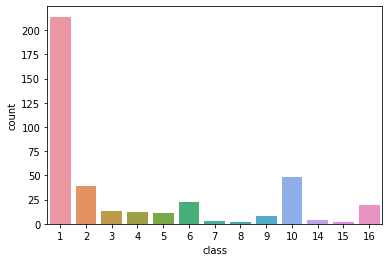

In [170]:
import seaborn as sns

#target : class
sns.countplot(x= y,data=df)

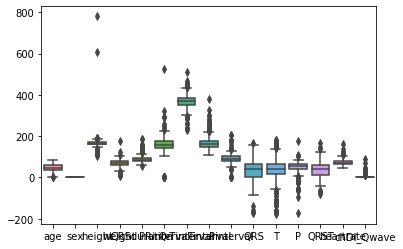

In [171]:
sns.boxplot(data = df.iloc[:,0:15] )

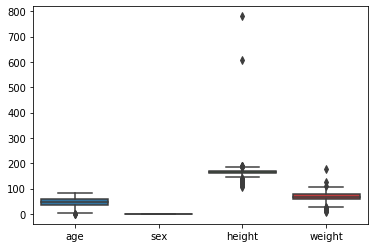

In [172]:
sns.boxplot(data = df.iloc[:,0:4] )

In [173]:
df.height.unique()

array([159, 165, 160, 171, 155, 172, 170, 177, 156, 169, 162, 167, 132,
       130, 175, 164, 173, 176, 124, 168, 180, 185, 166, 182, 163, 153,
       150, 110, 127, 157, 178, 780, 161, 190, 158, 181, 154, 119, 188,
       120, 133, 186, 140, 148, 174, 608, 184, 105, 149, 138, 179, 152,
       146], dtype=int64)

In [174]:
#height seems to have extreme outliers, removing records > 300

df = df[df.height <300]
df.head()

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,class
0,37,1,159,56,75,162,339,141,96,60,...,0.0,5.0,-1.3,0.0,0,0.4,1.2,9.4,16.6,1
1,52,0,165,80,88,202,369,113,97,58,...,-0.5,10.7,-1.7,0.0,0,0.4,-0.3,19.6,17.7,16
2,12,1,165,47,91,0,359,152,0,8,...,0.0,8.8,-0.6,0.0,0,-0.4,1.6,24.0,38.0,10
3,80,0,160,70,90,201,404,157,111,21,...,0.0,13.0,-1.9,0.0,0,0.9,0.4,26.7,30.3,1
4,72,0,171,74,77,172,330,140,104,33,...,0.0,6.8,0.0,0.0,0,0.7,0.8,25.8,31.4,1


In [175]:
df.height.unique()

array([159, 165, 160, 171, 155, 172, 170, 177, 156, 169, 162, 167, 132,
       130, 175, 164, 173, 176, 124, 168, 180, 185, 166, 182, 163, 153,
       150, 110, 127, 157, 178, 161, 190, 158, 181, 154, 119, 188, 120,
       133, 186, 140, 148, 174, 184, 105, 149, 138, 179, 152, 146],
      dtype=int64)

In [176]:
df.shape

(398, 279)

# SPLITTING THE DATASET

In [178]:

# splitting the dataset for X values

x = df.iloc[:,0:278]
x.head()

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_JJwaveAmp,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA
0,37,1,159,56,75,162,339,141,96,60,...,0.0,0.0,5.0,-1.3,0.0,0,0.4,1.2,9.4,16.6
1,52,0,165,80,88,202,369,113,97,58,...,-0.4,-0.5,10.7,-1.7,0.0,0,0.4,-0.3,19.6,17.7
2,12,1,165,47,91,0,359,152,0,8,...,0.2,0.0,8.8,-0.6,0.0,0,-0.4,1.6,24.0,38.0
3,80,0,160,70,90,201,404,157,111,21,...,-0.9,0.0,13.0,-1.9,0.0,0,0.9,0.4,26.7,30.3
4,72,0,171,74,77,172,330,140,104,33,...,0.0,0.0,6.8,0.0,0.0,0,0.7,0.8,25.8,31.4


In [179]:

# splitting the dataset for Y values (Target)

y = df["class"]
y.head(), type(y)

(0     1
 1    16
 2    10
 3     1
 4     1
 Name: class, dtype: int64, pandas.core.series.Series)

# SPLIT TRAIN AND TEST DATASET

In [180]:
from sklearn.model_selection import train_test_split

x_train_org, x_test_org, y_train,y_test = train_test_split(x, y, random_state = 0)

# default split is train:75%, test: 25%


# FEATURE SCALING

In [489]:
#Need to normalize or standardize the variables

"""
Scaling just changes the range of your data. 
Normalization is a more radical transformation. 
The point of normalization is to change your observations so that they can be described as a normal distribution.
"""

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train_org)
X_test = scaler.transform(x_test_org)

In [182]:
X_test

array([[0.2195122 , 1.        , 0.5875    , ..., 0.51546392, 0.40300752,
        0.36569579],
       [0.56097561, 0.        , 0.7       , ..., 0.50515464, 0.48571429,
        0.43754045],
       [0.37804878, 1.        , 0.625     , ..., 0.54639175, 0.49473684,
        0.4763754 ],
       ...,
       [0.35365854, 1.        , 0.625     , ..., 0.67010309, 0.44661654,
        0.51456311],
       [0.30487805, 1.        , 0.625     , ..., 0.63917526, 0.53082707,
        0.53074434],
       [0.45121951, 1.        , 0.625     , ..., 0.53608247, 0.52932331,
        0.48932039]])


# LOGISTIC REGRESSION

In [183]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve

In [184]:
from sklearn.linear_model import LogisticRegression

# search for optimun parameters using gridsearch
param_grid = {'penalty':['l1','l2'],
         'C':[0.01,0.1,1,10,100],
         'class_weight':['balanced',None]}
logistic_clf = GridSearchCV(LogisticRegression(),param_grid,cv=10)


In [185]:
#train the classifier
logistic_clf.fit(X_train,y_train)

logistic_clf.best_params_


C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logi

C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default mu

C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default mu

C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default mu

C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default mu

{'C': 1, 'class_weight': 'balanced', 'penalty': 'l1'}

In [186]:

#best params : {'C': 1, 'class_weight': 'balanced', 'penalty': 'l1'}

lr = LogisticRegression(penalty = 'l1', C= 1)
lr.fit(X_train,y_train)

print('Accuracy of logistic regression on training set: {:.4f}'
     .format(lr.score(X_train, y_train)))
print('Accuracy of logistic regression on test set: {:.4f}'
     .format(lr.score(X_test, y_test)))

Accuracy of logistic regression on training set: 0.7349
Accuracy of logistic regression on test set: 0.7300


C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [187]:
#Cross Validation

from sklearn.model_selection import cross_val_score

cvscore = cross_val_score(lr,X_train,y_train, cv=5)
print("Cross validation scores: {}".format(cvscore))
print("Average cross-validation scroe: {:.4f}".format(cvscore.mean()))

C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logis

Cross validation scores: [0.63076923 0.609375   0.67241379 0.69642857 0.72727273]
Average cross-validation scroe: 0.6673


C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [265]:
from  sklearn.metrics import accuracy_score, precision_score

y_pred_lr = lr.predict(X_test)
print(accuracy_score(y_test, y_pred_lr))
print(precision_score(y_test, y_pred_lr, average = 'macro'))

0.73
0.6452422989981675


C:\Users\haris\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


LOGISTIC REGRESSION RESULTS:

best params : {'C': 1, 'class_weight': 'balanced', 'penalty': 'l1'}

Average cross-validation scroe: 0.6673

Accuracy of logistic regression on test set: 0.7300

## SOFTMAX REGRESSION

In [203]:
"Logistic regression with multi-class parameter"

# search for optimun parameters using gridsearch
param_grid = {  'C':[0.01,0.1,1,10,100], 'class_weight':['balanced',None]}

softmax_clf = GridSearchCV(LogisticRegression(multi_class="multinomial",solver="lbfgs"),param_grid,cv=10)

In [204]:
#train the classifier
softmax_clf.fit(X_train,y_train)

softmax_clf.best_params_


C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed t

C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

{'C': 1, 'class_weight': None}

In [230]:

#best params : {'C': 1, 'class_weight': None}

softmax_clf = LogisticRegression(multi_class="multinomial",solver="lbfgs", C =1)
softmax_clf.fit(X_train,y_train)

print('Accuracy of softmax regression on training set: {:.4f}'
     .format(softmax_clf.score(X_train, y_train)))
print('Accuracy of softmax regression on test set: {:.4f}'
     .format(softmax_clf.score(X_test, y_test)))

Accuracy of softmax regression on training set: 0.8221
Accuracy of softmax regression on test set: 0.7200


C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [208]:
#Cross Validation

from sklearn.model_selection import cross_val_score

cvscore = cross_val_score(softmax_clf,X_train,y_train, cv=5)
print("Cross validation scores: {}".format(cvscore))
print("Average cross-validation scroe: {:.4f}".format(cvscore.mean()))

C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Cross validation scores: [0.64615385 0.59375    0.68965517 0.71428571 0.76363636]
Average cross-validation scroe: 0.6815


C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [266]:
from  sklearn.metrics import accuracy_score, precision_score

y_pred_softmax = softmax_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_softmax))
print(precision_score(y_test, y_pred_softmax, average = 'macro'))

0.72
0.40212832550860717


C:\Users\haris\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


SOFTMAX REGRESSION RESULTS

best params : {'C': 1, 'class_weight': None}

Average cross-validation scroe: 0.6815

Accuracy of softmax regression on test set: 0.7200

# KNN Classification

In [193]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
k = [1,2,3,4,5,6,7,8,9,10]
param_knn= [{'n_neighbors':k}]

knn_clf = GridSearchCV(knn, param_knn, cv=5)
knn_clf.fit(X_train,y_train)


C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [194]:
#Best n_neighbhor value
knn_clf.best_params_

{'n_neighbors': 3}

In [195]:
#Validation score
knn_clf.best_score_

0.587248322147651

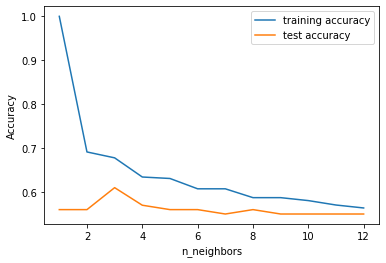

In [196]:
# plotting accuracy for different 'k' neighbours

training_accuracy = []
test_accuracy = []


# try n_neighbors from 1 to 12

neighbors_settings = range(1, 13)
for n_neighbors in neighbors_settings:
    # build the model
    classifier2 = KNeighborsClassifier(n_neighbors=n_neighbors)
    classifier2.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(classifier2.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(classifier2.score(X_test, y_test))
#plotting train and test scores for n_neighbors from 1 to 10
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

In [ ]:
# k = 3 seems to fit the model best

In [197]:
KNN_best = KNeighborsClassifier(n_neighbors= 3).fit(X_train, y_train)

print('Accuracy of KNN classifier on training set: {:.4f}'
     .format(KNN_best.score(X_train, y_train)))
print('Accuracy of KNN classifier on test set: {:.4f}'
     .format(KNN_best.score(X_test, y_test)))

Accuracy of KNN classifier on training set: 0.6779
Accuracy of KNN classifier on test set: 0.6100


In [198]:
#Cross Validation
from sklearn.model_selection import cross_val_score
cvscore = cross_val_score(KNN_best,X_train,y_train, cv=5)
print("Cross validation scores: {}".format(cvscore))
print("Average cross-validation scroe: {:.4f}".format(cvscore.mean()))

Cross validation scores: [0.55384615 0.546875   0.5862069  0.625      0.63636364]
Average cross-validation scroe: 0.5897


C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


In [267]:
from  sklearn.metrics import accuracy_score, precision_score

y_pred_knn = KNN_best.predict(X_test)
print(accuracy_score(y_test, y_pred_knn))
print(precision_score(y_test, y_pred_knn, average = 'macro'))

0.61
0.3980952380952381


C:\Users\haris\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


KNN Classification Results:
    
Best params: k =3
    
Average cross-validation scroe: 0.5897

Average cross-validation scroe: 0.5897

# Linear SVC

In [ ]:
#This class supports both dense and sparse input and the multiclass support
#is handled according to a one-vs-the-rest scheme.

"""
multi_class{‘ovr’, ‘crammer_singer’}, default=’ovr’

Determines the multi-class strategy if y contains more than two classes.

"ovr" trains n_classes one-vs-rest classifiers, while "crammer_singer"
optimizes a joint objective over all classes. 
While crammer_singer is interesting from a theoretical perspective as it is consistent, 
it is seldom used in practice as it rarely leads to better accuracy and is more expensive to compute. 
If "crammer_singer" is chosen, the options loss, penalty and dual will be ignored.
"""

In [209]:
from sklearn.svm import SVC, LinearSVC

LSVC_params = {'C':[0.01, 0.1, 1, 10, 100], 'multi_class': ['ovr', 'crammer_singer']}


In [210]:
# Uisng Grid search to find the best parameters and fitting the model
LSVC_clf = GridSearchCV(LinearSVC(), LSVC_params,cv=5)
LSVC_clf.fit(X_train,y_train)

C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to co

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'multi_class': ['ovr', 'crammer_singer']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [211]:
LSVC_clf.best_params_

{'C': 0.1, 'multi_class': 'ovr'}

In [212]:
# best param :{'C': 0.1, 'multi_class': 'ovr'}

LSVC_clf = LinearSVC (C=0.1, multi_class = 'ovr')
LSVC_clf.fit(X_train,y_train)

print('Accuracy of linear SVC on training set: {:.4f}'
     .format(LSVC_clf.score(X_train, y_train)))
print('Accuracy of linear SVC on test set: {:.4f}'
     .format(LSVC_clf.score(X_test, y_test)))

Accuracy of linear SVC on training set: 0.8054
Accuracy of linear SVC on test set: 0.7200


In [222]:
#Cross Validation
cvscore = cross_val_score(LinearSVC(C=0.1, multi_class = 'ovr'), X_train, y_train, cv=5)
print("Cross validation scores: {}".format(cvscore))
print("Average cross-validation score: {:.4f}".format(cvscore.mean()))

C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Cross validation scores: [0.66153846 0.59375    0.72413793 0.71428571 0.76363636]
Average cross-validation score: 0.6915


In [268]:
from  sklearn.metrics import accuracy_score, precision_score

y_pred_LSVC = LSVC_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_LSVC))
print(precision_score(y_test, y_pred_LSVC, average = 'macro'))

0.72
0.5026984126984126


C:\Users\haris\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


LinearSVC Results:

Best params :{'C': 0.1, 'multi_class': 'ovr'}

Average cross-validation score: 0.6915

Accuracy of linear SVC on test set: 0.7200

# SVC -  Linear Kernel

In [219]:
from sklearn.svm import SVC 

SVC_linear = SVC(max_iter=10000)
SVC_linear_params = {'C':[0.001, 0.01, 0.1, 1, 10],'gamma':[10,1,0.1,0.01,0.001], 'kernel':['linear']}

In [220]:
# Uisng Grid search to find the best parameters and fitting the model

grid_SVC_linear = GridSearchCV(SVC_linear, SVC_linear_params,cv=5)

grid_SVC_linear.fit(X_train,y_train)

C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf',
                           max_iter=10000, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [10, 1, 0.1, 0.01, 0.001],
                         'kernel': ['linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [240]:
grid_SVC_linear.best_params_

{'C': 1, 'gamma': 10, 'kernel': 'linear'}

In [239]:
# best params: {'C': 1, 'gamma': 10, 'kernel': 'linear'}

SVC_linear_clf= SVC(kernel='linear', C= 0.001, gamma= 10)
SVC_linear_clf.fit(X_train,y_train)
SVC_linear_clf.score(X_train,y_train)
print('Accuracy of SVC Linear kernel on training set: {:.4f}'
     .format(SVC_linear_clf.score(X_train, y_train)))
print('Accuracy of SVC Linear kernel on test set: {:.4f}'
     .format(SVC_linear_clf.score(X_test, y_test)))

Accuracy of SVC Linear kernel on training set: 0.5336
Accuracy of SVC Linear kernel on test set: 0.5500


In [241]:
#Cross Validation
cvscore = cross_val_score(SVC(kernel='linear', C=1, gamma=10), X_train, y_train, cv=5)
print("Cross validation scores: {}".format(cvscore))
print("Average cross-validation score: {:.4f}".format(cvscore.mean()))

C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Cross validation scores: [0.66153846 0.578125   0.75862069 0.69642857 0.76363636]
Average cross-validation score: 0.6917


In [269]:
from  sklearn.metrics import accuracy_score, precision_score

y_pred_SVC_l = SVC_linear_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_SVC_l))
print(precision_score(y_test, y_pred_SVC_l, average = 'macro'))

0.55
0.061111111111111116


C:\Users\haris\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


SVC Linear Kernel Results:

Best params: {'C': 1, 'gamma': 10, 'kernel': 'linear'}

Average cross-validation score: 0.6917

Accuracy of SVC Linear kernel on test set: 0.5500

# SVC - RBF Kernel

In [224]:
SVC_rbf = SVC(max_iter=10000)

SVC_rbf_params = {'C':[0.001, 0.01, 0.1, 1, 10],'gamma':[10,1,0.1,0.01,0.001], 'kernel':['rbf']}

In [225]:
# Uisng Grid search to find the best parameters and fitting the model
grid_SVC_rbf = GridSearchCV(SVC_rbf, SVC_rbf_params, cv=5)
grid_SVC_rbf.fit(X_train,y_train)

C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf',
                           max_iter=10000, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [10, 1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [226]:
grid_SVC_rbf.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [237]:
# Best params: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

SVC_rbf_clf= SVC(kernel='rbf', C= 10, gamma= 0.1)
SVC_rbf_clf.fit(X_train,y_train)

print('Accuracy of SVC rbf kernel on training set: {:.4f}'
     .format(SVC_rbf_clf.score(X_train, y_train)))
print('Accuracy of SVC rbf kernel on test set: {:.4f}'
     .format(SVC_rbf_clf.score(X_test, y_test)))

Accuracy of SVC rbf kernel on training set: 0.9765
Accuracy of SVC rbf kernel on test set: 0.7300


In [229]:
#Cross Validation
cvscore = cross_val_score(SVC(kernel='rbf', C=10, gamma=0.1), X_train, y_train, cv=5)
print("Cross validation scores: {}".format(cvscore))
print("Average cross-validation score: {:.4f}".format(cvscore.mean()))

C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Cross validation scores: [0.67692308 0.59375    0.70689655 0.71428571 0.78181818]
Average cross-validation score: 0.6947


In [270]:
from  sklearn.metrics import accuracy_score, precision_score

y_pred_SVC_rbf = SVC_rbf_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_SVC_rbf))
print(precision_score(y_test, y_pred_SVC_rbf, average = 'macro'))

0.73
0.5529100529100529


C:\Users\haris\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


SVC RBF Kernel Results:
    
Best params: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

Average cross-validation score: 0.6947

Accuracy of SVC rbf kernel on test set: 0.7300

# SVC - Poly Kernel

In [231]:
SVC_poly = SVC(max_iter=10000)

SVC_poly_params = {'C':[0.001, 0.01, 0.1, 1, 10],'gamma':[10,1,0.1,0.01,0.001], 'kernel':['poly']}

In [232]:
# Uisng Grid search to find the best parameters and fitting the model
grid_SVC_poly = GridSearchCV(SVC_poly, SVC_poly_params,cv=5)
grid_SVC_poly.fit(X_train,y_train)

C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf',
                           max_iter=10000, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [10, 1, 0.1, 0.01, 0.001],
                         'kernel': ['poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [233]:
grid_SVC_poly.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}

In [236]:
# Best params: {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}

SVC_poly_clf= SVC(kernel='poly', C= 0.1, gamma= 0.1)
SVC_poly_clf.fit(X_train,y_train)

print('Accuracy of SVC poly kernel on training set: {:.4f}'
     .format(SVC_poly_clf.score(X_train, y_train)))
print('Accuracy of SVC poly kernel on test set: {:.4f}'
     .format(SVC_poly_clf.score(X_test, y_test)))

Accuracy of SVC poly kernel on training set: 0.8926
Accuracy of SVC poly kernel on test set: 0.7300


In [235]:
#Cross Validation
cvscore = cross_val_score(SVC(kernel='poly',C=0.1,gamma=0.1), X_train, y_train, cv=5)
print("Cross validation scores: {}".format(cvscore))
print("Average cross-validation score: {:.4f}".format(cvscore.mean()))

C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Cross validation scores: [0.66153846 0.59375    0.75862069 0.71428571 0.76363636]
Average cross-validation score: 0.6984


In [271]:
from  sklearn.metrics import accuracy_score, precision_score

y_pred_SVC_poly = SVC_poly_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_SVC_poly))
print(precision_score(y_test, y_pred_SVC_poly, average = 'macro'))

0.73
0.4263835263835264


C:\Users\haris\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


SVC Poly Kernel Results:

Best params: {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}

Average cross-validation score: 0.6984

Accuracy of SVC poly kernel on test set: 0.7300

# Decision Tree

In [242]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

grid_dt = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5)
grid_dt.fit(X_train,y_train)

C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 

In [244]:
print("Best parameters: {}".format(grid_dt.best_params_))

print("Best cross-validation score: {:.2f}".format(grid_dt.best_score_))


Best parameters: {'criterion': 'entropy', 'max_depth': 4}
Best cross-validation score: 0.65


In [245]:
# Best parameters: {'criterion': 'entropy', 'max_depth': 4}

dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)
dt.fit(X_train,y_train)

print('Accuracy of Decision tree on training set: {:.4f}'
     .format(dt.score(X_train, y_train)))
print('Accuracy of Decision tree on test set: {:.4f}'
     .format(dt.score(X_test, y_test)))

Accuracy of Decision tree on training set: 0.7550
Accuracy of Decision tree on test set: 0.6800


In [246]:
#Cross Validation
cvscore = cross_val_score(DecisionTreeClassifier(criterion = 'entropy', max_depth = 4), X_train, y_train, cv=5)
print("Cross validation scores: {}".format(cvscore))
print("Average cross-validation score: {:.4f}".format(cvscore.mean()))

C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Cross validation scores: [0.64615385 0.625      0.60344828 0.64285714 0.67272727]
Average cross-validation score: 0.6380


In [272]:
from  sklearn.metrics import accuracy_score, precision_score

y_pred_dt = dt.predict(X_test)
print(accuracy_score(y_test, y_pred_dt))
print(precision_score(y_test, y_pred_dt, average = 'macro'))

0.68
0.3958247966722543


C:\Users\haris\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


 Decision Tree Results:
 
Best parameters: {'criterion': 'entropy', 'max_depth': 4}

Average cross-validation score: 0.6380

Accuracy of Decision tree on test set: 0.6800

# Random Forests

In [248]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs = -1)

forest_params={'criterion':['gini','entropy'],'bootstrap': [True, False],'class_weight':['balanced', 'balanced_subsample'] }

grid_forest = GridSearchCV(forest, forest_params,cv=5)
grid_forest.fit(X_train, y_train)

C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'bootst

In [251]:
print("Best parameters: {}".format(grid_forest.best_params_))

print("Best cross-validation score: {:.2f}".format(grid_forest.best_score_))

Best parameters: {'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'gini'}
Best cross-validation score: 0.67


In [253]:
# Best parameters: {'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'gini'}

randomforest_clf = RandomForestClassifier(n_estimators=100, bootstrap = True, class_weight = 'balanced' , criterion = 'gini',random_state=0, n_jobs = -1)
randomforest_clf.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(randomforest_clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(randomforest_clf.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.670


In [257]:
# Feature importances

rf_result = pd.DataFrame({'col_name': randomforest_clf.feature_importances_}, index=x_train_org.columns).sort_values(by='col_name', ascending=False)
rf_result

,col_name
heartrate,0.044024
chDII_RwaveAmp,0.015759
PRinterval,0.014255
chAVF_Qwave,0.013982
chV1_QRSA,0.013526
...,...
chV1_RTwaveExists,0.000000
chDII_RTwaveExists,0.000000
chDIII_DD_RPwaveExists,0.000000
chDIII_RPwaveExists,0.000000


In [254]:
cvscore = cross_val_score(RandomForestClassifier(n_estimators=100, bootstrap = True, class_weight = 'balanced' , criterion = 'gini',random_state=0, n_jobs = -1), X_train, y_train, cv=5)

print("Cross validation scores: {}".format(cvscore))
print("Average cross-validation score: {:.4f}".format(cvscore.mean()))

C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Cross validation scores: [0.63076923 0.59375    0.70689655 0.71428571 0.70909091]
Average cross-validation score: 0.6710


In [273]:
from  sklearn.metrics import accuracy_score, precision_score

y_pred_rf = randomforest_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_rf))
print(precision_score(y_test, y_pred_rf, average = 'macro'))

0.67
0.44365079365079363


C:\Users\haris\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Random Forest Results:
    
Best parameters: {'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'gini'}

Average cross-validation score: 0.6710

Accuracy on test set: 0.670

# OOB Score for Random Forests

In [258]:
randomforest_clf2 = RandomForestClassifier(n_estimators=100, bootstrap = True, class_weight = 'balanced' , oob_score = True, criterion = 'gini',random_state=0, n_jobs = -1)
randomforest_clf2.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(randomforest_clf2.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(randomforest_clf2.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.670


In [259]:
# Feature importances

rf_result2 = pd.DataFrame({'col_name': randomforest_clf2.feature_importances_}, index=x_train_org.columns).sort_values(by='col_name', ascending=False)
rf_result2

,col_name
heartrate,0.044024
chDII_RwaveAmp,0.015759
PRinterval,0.014255
chAVF_Qwave,0.013982
chV1_QRSA,0.013526
...,...
chV1_RTwaveExists,0.000000
chDII_RTwaveExists,0.000000
chDIII_DD_RPwaveExists,0.000000
chDIII_RPwaveExists,0.000000


In [260]:
cvscore = cross_val_score(RandomForestClassifier(n_estimators=100, bootstrap = True, class_weight = 'balanced' , oob_score = True, criterion = 'gini',random_state=0, n_jobs = -1), X_train, y_train, cv=5)

print("Cross validation scores: {}".format(cvscore))
print("Average cross-validation score: {:.4f}".format(cvscore.mean()))

C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Cross validation scores: [0.63076923 0.59375    0.70689655 0.71428571 0.70909091]
Average cross-validation score: 0.6710


In [274]:
from  sklearn.metrics import accuracy_score, precision_score

y_pred_rf_oob = randomforest_clf2.predict(X_test)
print(accuracy_score(y_test, y_pred_rf_oob))
print(precision_score(y_test, y_pred_rf_oob, average = 'macro'))

0.67
0.44365079365079363


C:\Users\haris\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Bagging and Pasting

For Decision Tree

In [261]:
from sklearn.ensemble import BaggingClassifier

dt_clf = DecisionTreeClassifier(random_state=0)
bag_clf = BaggingClassifier(dt_clf, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)


bag_clf.fit(X_train, y_train)

print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))


Train score: 0.88
Test score: 0.79


In [264]:
from  sklearn.metrics import accuracy_score, precision_score

y_pred = bag_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'macro'))

0.79
0.5664042498719918


C:\Users\haris\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [281]:
# Using GRID SEARCH to check if bagging or pasting works good along with Cross Validation
# Bagging and pasting is done with best 3 models

dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4) # with best params from the above decision tree
bag = BaggingClassifier(dt, n_estimators=500, max_samples=100, n_jobs=-1, random_state=0)

bag_params = {'bootstrap': [True, False]} #checking if bagging or pasting works good <True - Bagging / False - Pasting>

grid_bag = GridSearchCV(bag, bag_params, cv = 5)
grid_bag.fit(X_train, y_train)

print("Best parameters: {}".format(grid_bag.best_params_))

print("Best cross-validation score: {:.2f}".format(grid_bag.best_score_))


C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameters: {'bootstrap': False}
Best cross-validation score: 0.70


In [282]:
# choosing Pasting instead of Bagging

dt_past = BaggingClassifier(dt, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=0)


dt_past.fit(X_train, y_train)
print('Train score: {:.2f}'.format(dt_past.score(X_train, y_train)))
print('Test score: {:.2f}'.format(dt_past.score(X_test, y_test)))

Train score: 0.82
Test score: 0.77


In [283]:
from  sklearn.metrics import accuracy_score, precision_score

y_pred = dt_past.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'macro'))

0.77
0.5675647881530235


C:\Users\haris\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


For LinearSVC

In [295]:
# Using GRID SEARCH to check if bagging or pasting works good along with Cross Validation
# Bagging and pasting is done with best 3 models

LSVC_clf = LinearSVC (C=0.1, multi_class = 'ovr') # with best params from the above LinearSVC
bag = BaggingClassifier(LSVC_clf, n_estimators=500, max_samples=100, n_jobs=-1, random_state=0)

bag_params = {'bootstrap': [True, False]} #checking if bagging or pasting works good <True - Bagging / False - Pasting>

grid_bag = GridSearchCV(bag, bag_params, cv = 5)
grid_bag.fit(X_train, y_train)

print("Best parameters: {}".format(grid_bag.best_params_))

print("Best cross-validation score: {:.2f}".format(grid_bag.best_score_))


C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameters: {'bootstrap': True}
Best cross-validation score: 0.69


In [297]:
# Choosing Bagging for this model

bag_LSVC = BaggingClassifier(LSVC_clf, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)


bag_LSVC.fit(X_train, y_train)
print('Train score: {:.2f}'.format(bag_LSVC.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_LSVC.score(X_test, y_test)))

Train score: 0.81
Test score: 0.72


In [298]:
from  sklearn.metrics import accuracy_score, precision_score

y_pred = bag_LSVC.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'macro'))

0.72
0.5026984126984126


C:\Users\haris\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


For Logistic Regression

In [299]:
# Using GRID SEARCH to check if bagging or pasting works good along with Cross Validation
# Bagging and pasting is done with best 3 models

lr = LogisticRegression(penalty = 'l1', C= 1) # with best params from the above logistic regression
bag = BaggingClassifier(lr, n_estimators=500, max_samples=100, n_jobs=-1, random_state=0)

bag_params = {'bootstrap': [True, False]} #checking if bagging or pasting works good <True - Bagging / False - Pasting>

grid_bag = GridSearchCV(bag, bag_params, cv = 5)
grid_bag.fit(X_train, y_train)

print("Best parameters: {}".format(grid_bag.best_params_))

print("Best cross-validation score: {:.2f}".format(grid_bag.best_score_))


C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameters: {'bootstrap': False}
Best cross-validation score: 0.61


In [305]:
# Choosing Pasting for this model

past_LR = BaggingClassifier(lr, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=0)


past_LR.fit(X_train, y_train)
print('Train score: {:.2f}'.format(past_LR.score(X_train, y_train)))
print('Test score: {:.2f}'.format(past_LR.score(X_test, y_test)))

Train score: 0.63
Test score: 0.65


In [303]:
from  sklearn.metrics import accuracy_score, precision_score

y_pred = past_LR.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'macro'))

0.65
0.28095238095238095


C:\Users\haris\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# AdaBoosting

For Decision tree

In [307]:
from sklearn.ensemble import AdaBoostClassifier

dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4) # with best params from the above decision tree

ada_params = {'learning_rate': [0.1,0.3,0.5,0.7,1], 'n_estimators': [3,5,7,10,20,30,40,50,100,150,200]}
ada_clf = AdaBoostClassifier(dt, algorithm="SAMME.R", random_state=0)

grid_ada = GridSearchCV(ada_clf, ada_params, cv =5)
grid_ada.fit(X_train, y_train)

print("Best parameters: {}".format(grid_ada.best_params_))

print("Best cross-validation score: {:.2f}".format(grid_ada.best_score_))

C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Best cross-validation score: 0.68


In [314]:

ada_dt = AdaBoostClassifier(dt, n_estimators=100, learning_rate = 0.1 , algorithm="SAMME.R", random_state=0)


ada_dt.fit(X_train, y_train)
print('Train score: {:.2f}'.format(ada_dt.score(X_train, y_train)))
print('Test score: {:.2f}'.format(ada_dt.score(X_test, y_test)))

Train score: 1.00
Test score: 0.68


In [315]:
from  sklearn.metrics import accuracy_score, precision_score

y_pred = ada_dt.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'macro'))

0.68
0.550858550858551


C:\Users\haris\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


For LinearSVC

In [317]:
from sklearn.ensemble import AdaBoostClassifier

LSVC_clf = LinearSVC (C=0.1, multi_class = 'ovr') # with best params from the above LinearSVC

ada_params = {'learning_rate': [0.1,0.3,0.5,0.7,1], 'n_estimators': [3,5,7,10,20,30,40,50,100,150,200]}
ada_clf = AdaBoostClassifier(LSVC_clf, algorithm="SAMME", random_state=0)

grid_ada = GridSearchCV(ada_clf, ada_params, cv =5)
grid_ada.fit(X_train, y_train)

print("Best parameters: {}".format(grid_ada.best_params_))

print("Best cross-validation score: {:.2f}".format(grid_ada.best_score_))

C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameters: {'learning_rate': 0.1, 'n_estimators': 3}
Best cross-validation score: 0.69


In [318]:

ada_LSVC = AdaBoostClassifier(dt, n_estimators=3, learning_rate =0.1 , algorithm="SAMME.R", random_state=0)


ada_LSVC.fit(X_train, y_train)
print('Train score: {:.2f}'.format(ada_LSVC.score(X_train, y_train)))
print('Test score: {:.2f}'.format(ada_LSVC.score(X_test, y_test)))

Train score: 0.88
Test score: 0.69


In [319]:
from  sklearn.metrics import accuracy_score, precision_score

y_pred = ada_LSVC.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'macro'))

0.69
0.5277746212121212


C:\Users\haris\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Gradient Boosting

In [320]:
from sklearn.ensemble import GradientBoostingClassifier

gb_params = {'learning_rate': [0.1,0.3,0.5,0.7,1], 'n_estimators': [3,5,7,10,20,30,40,50,100,150,200]}
gb_clf = GradientBoostingClassifier(random_state=0)


grid_gb = GridSearchCV(gb_clf, gb_params, cv =5)
grid_gb.fit(X_train, y_train)

print("Best parameters: {}".format(grid_gb.best_params_))

print("Best cross-validation score: {:.2f}".format(grid_gb.best_score_))

C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameters: {'learning_rate': 0.1, 'n_estimators': 150}
Best cross-validation score: 0.70


In [322]:

gb = GradientBoostingClassifier(n_estimators=150, learning_rate = 0.1 , random_state=0)


gb.fit(X_train, y_train)
print('Train score: {:.2f}'.format(gb.score(X_train, y_train)))
print('Test score: {:.2f}'.format(gb.score(X_test, y_test)))

Train score: 1.00
Test score: 0.78


In [323]:
from  sklearn.metrics import accuracy_score, precision_score

y_pred = gb.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'macro'))

0.78
0.5700438596491229


C:\Users\haris\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# PCA

Running all the above models with Principle Components

In [325]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95) #n_comp accepts both number of copm and exp var ratio
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)


In [326]:
pca.n_components_

78

In [327]:
np.sum(pca.explained_variance_ratio_)

0.9512030123654721


# LOGISTIC REGRESSION

In [183]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve

In [328]:
from sklearn.linear_model import LogisticRegression

# search for optimun parameters using gridsearch
param_grid = {'penalty':['l1','l2'],
         'C':[0.01,0.1,1,10,100],
         'class_weight':['balanced',None]}
pca_logistic_clf = GridSearchCV(LogisticRegression(),param_grid,cv=10)


In [329]:
#train the classifier
pca_logistic_clf.fit(X_train_reduced,y_train)

pca_logistic_clf.best_params_


C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logi

C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default mu

C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default mu

C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default mu

C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default mu

C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sk

{'C': 1, 'class_weight': None, 'penalty': 'l2'}

In [334]:

#best params : {'C': 1, 'class_weight': None, 'penalty': 'l2'}

pca_lr = LogisticRegression(penalty = 'l2', C= 1)
pca_lr.fit(X_train_reduced,y_train)

print('Accuracy of logistic regression on training set: {:.4f}'
     .format(pca_lr.score(X_train_reduced, y_train)))
print('Accuracy of logistic regression on test set: {:.4f}'
     .format(pca_lr.score(X_test_reduced, y_test)))

Accuracy of logistic regression on training set: 0.7852
Accuracy of logistic regression on test set: 0.7000


C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [337]:
#Cross Validation

from sklearn.model_selection import cross_val_score

cvscore = cross_val_score(pca_lr,X_train_reduced,y_train, cv=5)
print("Cross validation scores: {}".format(cvscore))
print("Average cross-validation scroe: {:.4f}".format(cvscore.mean()))

C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logis

Cross validation scores: [0.64615385 0.59375    0.72413793 0.71428571 0.76363636]
Average cross-validation scroe: 0.6884


C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [336]:
from  sklearn.metrics import accuracy_score, precision_score

y_pred_lr = pca_lr.predict(X_test_reduced)
print(accuracy_score(y_test, y_pred_lr))
print(precision_score(y_test, y_pred_lr, average = 'macro'))

0.7
0.5434595034595034


C:\Users\haris\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PCA - LOGISTIC REGRESSION RESULTS:

best params : {'C': 1, 'class_weight': 'balanced', 'penalty': 'l2'}

Average cross-validation scroe: 0.68

Accuracy of logistic regression on test set: 0.72

## SOFTMAX REGRESSION

In [338]:
"Logistic regression with multi-class parameter"

# search for optimun parameters using gridsearch
param_grid = {  'C':[0.01,0.1,1,10,100], 'class_weight':['balanced',None]}

pca_softmax_clf = GridSearchCV(LogisticRegression(multi_class="multinomial",solver="lbfgs"),param_grid,cv=10)

In [339]:
#train the classifier
pca_softmax_clf.fit(X_train_reduced,y_train)

pca_softmax_clf.best_params_


C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed t

{'C': 1, 'class_weight': None}

In [340]:

#best params : {'C': 1, 'class_weight': None}

pca_softmax_clf = LogisticRegression(multi_class="multinomial",solver="lbfgs", C =1)
pca_softmax_clf.fit(X_train_reduced,y_train)

print('Accuracy of softmax regression on training set: {:.4f}'
     .format(pca_softmax_clf.score(X_train_reduced, y_train)))
print('Accuracy of softmax regression on test set: {:.4f}'
     .format(pca_softmax_clf.score(X_test_reduced, y_test)))

Accuracy of softmax regression on training set: 0.7886
Accuracy of softmax regression on test set: 0.7100


In [341]:
#Cross Validation

from sklearn.model_selection import cross_val_score

cvscore = cross_val_score(pca_softmax_clf,X_train_reduced,y_train, cv=5)
print("Cross validation scores: {}".format(cvscore))
print("Average cross-validation scroe: {:.4f}".format(cvscore.mean()))

C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Cross validation scores: [0.64615385 0.609375   0.68965517 0.71428571 0.76363636]
Average cross-validation scroe: 0.6846


In [342]:
from  sklearn.metrics import accuracy_score, precision_score

y_pred_softmax = pca_softmax_clf.predict(X_test_reduced)
print(accuracy_score(y_test, y_pred_softmax))
print(precision_score(y_test, y_pred_softmax, average = 'macro'))

0.71
0.5564731398064732


C:\Users\haris\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


SOFTMAX REGRESSION RESULTS

best params : {'C': 1, 'class_weight': None}

Average cross-validation scroe: 0.68

Accuracy of softmax regression on test set: 0.71

# KNN Classification

In [343]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
k = [1,2,3,4,5,6,7,8,9,10]
param_knn= [{'n_neighbors':k}]

pca_knn_clf = GridSearchCV(knn, param_knn, cv=5)
pca_knn_clf.fit(X_train_reduced,y_train)


C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [344]:
#Best n_neighbhor value
pca_knn_clf.best_params_

{'n_neighbors': 3}

In [347]:
#Validation score
pca_knn_clf.best_score_

0.587248322147651

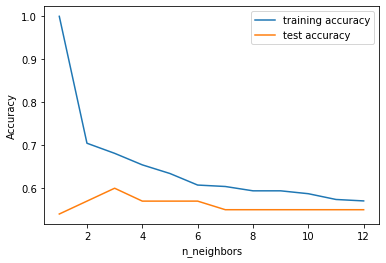

In [348]:
# plotting accuracy for different 'k' neighbours

training_accuracy = []
test_accuracy = []


# try n_neighbors from 1 to 12

neighbors_settings = range(1, 13)
for n_neighbors in neighbors_settings:
    # build the model
    classifier2 = KNeighborsClassifier(n_neighbors=n_neighbors)
    classifier2.fit(X_train_reduced, y_train)
    # record training set accuracy
    training_accuracy.append(classifier2.score(X_train_reduced, y_train))
    # record test set accuracy
    test_accuracy.append(classifier2.score(X_test_reduced, y_test))
#plotting train and test scores for n_neighbors from 1 to 10
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

In [ ]:
# k = 3 seems to fit the model best

In [350]:
pca_KNN_best = KNeighborsClassifier(n_neighbors= 3).fit(X_train_reduced, y_train)

print('Accuracy of KNN classifier on training set: {:.4f}'
     .format(pca_KNN_best.score(X_train_reduced, y_train)))
print('Accuracy of KNN classifier on test set: {:.4f}'
     .format(pca_KNN_best.score(X_test_reduced, y_test)))

Accuracy of KNN classifier on training set: 0.6812
Accuracy of KNN classifier on test set: 0.6000


In [353]:
#Cross Validation
from sklearn.model_selection import cross_val_score
cvscore = cross_val_score(pca_KNN_best,X_train_reduced,y_train, cv=5)
print("Cross validation scores: {}".format(cvscore))
print("Average cross-validation scroe: {:.4f}".format(cvscore.mean()))

Cross validation scores: [0.53846154 0.53125    0.60344828 0.64285714 0.63636364]
Average cross-validation scroe: 0.5905


C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


In [354]:
from  sklearn.metrics import accuracy_score, precision_score

y_pred_knn = pca_KNN_best.predict(X_test_reduced)
print(accuracy_score(y_test, y_pred_knn))
print(precision_score(y_test, y_pred_knn, average = 'macro'))

0.6
0.3559839357429719


C:\Users\haris\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


KNN Classification Results:
    
Best params: k =3
    
Average cross-validation scroe: 0.5897

Accuracy of KNN classifier on test set: 0.6000

# Linear SVC

In [ ]:
#This class supports both dense and sparse input and the multiclass support
#is handled according to a one-vs-the-rest scheme.

"""
multi_class{‘ovr’, ‘crammer_singer’}, default=’ovr’

Determines the multi-class strategy if y contains more than two classes.

"ovr" trains n_classes one-vs-rest classifiers, while "crammer_singer"
optimizes a joint objective over all classes. 
While crammer_singer is interesting from a theoretical perspective as it is consistent, 
it is seldom used in practice as it rarely leads to better accuracy and is more expensive to compute. 
If "crammer_singer" is chosen, the options loss, penalty and dual will be ignored.
"""

In [209]:
from sklearn.svm import SVC, LinearSVC

LSVC_params = {'C':[0.01, 0.1, 1, 10, 100], 'multi_class': ['ovr', 'crammer_singer']}


In [355]:
# Uisng Grid search to find the best parameters and fitting the model
pca_LSVC_clf = GridSearchCV(LinearSVC(), LSVC_params,cv=5)
pca_LSVC_clf.fit(X_train_reduced,y_train)

C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to co

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'multi_class': ['ovr', 'crammer_singer']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [357]:
pca_LSVC_clf.best_params_

{'C': 0.1, 'multi_class': 'ovr'}

In [358]:
# best param :{'C': 0.1, 'multi_class': 'ovr'}

pca_LSVC_clf = LinearSVC (C=0.1, multi_class = 'ovr')
pca_LSVC_clf.fit(X_train_reduced,y_train)

print('Accuracy of linear SVC on training set: {:.4f}'
     .format(pca_LSVC_clf.score(X_train_reduced, y_train)))
print('Accuracy of linear SVC on test set: {:.4f}'
     .format(pca_LSVC_clf.score(X_test_reduced, y_test)))

Accuracy of linear SVC on training set: 0.7785
Accuracy of linear SVC on test set: 0.7000


In [359]:
#Cross Validation
cvscore = cross_val_score(LinearSVC(C=0.1, multi_class = 'ovr'), X_train_reduced, y_train, cv=5)
print("Cross validation scores: {}".format(cvscore))
print("Average cross-validation score: {:.4f}".format(cvscore.mean()))

Cross validation scores: [0.64615385 0.59375    0.74137931 0.71428571 0.74545455]
Average cross-validation score: 0.6882


C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


In [360]:
from  sklearn.metrics import accuracy_score, precision_score

y_pred_LSVC = pca_LSVC_clf.predict(X_test_reduced)
print(accuracy_score(y_test, y_pred_LSVC))
print(precision_score(y_test, y_pred_LSVC, average = 'macro'))

0.7
0.41354816354816354


C:\Users\haris\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


LinearSVC Results:

Best params :{'C': 0.1, 'multi_class': 'ovr'}

Average cross-validation score: 0.69

Accuracy of linear SVC on test set: 0.7

# SVC -  Linear Kernel

In [361]:
from sklearn.svm import SVC 

SVC_linear = SVC(max_iter=10000)
SVC_linear_params = {'C':[0.001, 0.01, 0.1, 1, 10],'gamma':[10,1,0.1,0.01,0.001], 'kernel':['linear']}

In [362]:
# Uisng Grid search to find the best parameters and fitting the model

pcagrid_SVC_linear = GridSearchCV(SVC_linear, SVC_linear_params,cv=5)

pcagrid_SVC_linear.fit(X_train_reduced,y_train)

C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf',
                           max_iter=10000, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [10, 1, 0.1, 0.01, 0.001],
                         'kernel': ['linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [363]:
pcagrid_SVC_linear.best_params_

{'C': 1, 'gamma': 10, 'kernel': 'linear'}

In [365]:
# best params: {'C': 1, 'gamma': 10, 'kernel': 'linear'}

pcaSVC_linear_clf= SVC(kernel='linear', C= 1, gamma= 10)
pcaSVC_linear_clf.fit(X_train_reduced,y_train)
pcaSVC_linear_clf.score(X_train_reduced,y_train)
print('Accuracy of SVC Linear kernel on training set: {:.4f}'
     .format(pcaSVC_linear_clf.score(X_train_reduced, y_train)))
print('Accuracy of SVC Linear kernel on test set: {:.4f}'
     .format(pcaSVC_linear_clf.score(X_test_reduced, y_test)))

Accuracy of SVC Linear kernel on training set: 0.8691
Accuracy of SVC Linear kernel on test set: 0.7300


In [366]:
#Cross Validation
cvscore = cross_val_score(SVC(kernel='linear', C=1, gamma=10), X_train_reduced, y_train, cv=5)
print("Cross validation scores: {}".format(cvscore))
print("Average cross-validation score: {:.4f}".format(cvscore.mean()))

Cross validation scores: [0.64615385 0.59375    0.75862069 0.69642857 0.76363636]
Average cross-validation score: 0.6917


C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


In [367]:
from  sklearn.metrics import accuracy_score, precision_score

y_pred_SVC_l = pcaSVC_linear_clf.predict(X_test_reduced)
print(accuracy_score(y_test, y_pred_SVC_l))
print(precision_score(y_test, y_pred_SVC_l, average = 'macro'))

0.73
0.4256203890006707


C:\Users\haris\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


SVC Linear Kernel Results:

Best params: {'C': 1, 'gamma': 10, 'kernel': 'linear'}

Average cross-validation score: 0.6917

Accuracy of SVC Linear kernel on test set: 0.73

# SVC - RBF Kernel

In [368]:
SVC_rbf = SVC(max_iter=10000)

SVC_rbf_params = {'C':[0.001, 0.01, 0.1, 1, 10],'gamma':[10,1,0.1,0.01,0.001], 'kernel':['rbf']}

In [369]:
# Uisng Grid search to find the best parameters and fitting the model
pcagrid_SVC_rbf = GridSearchCV(SVC_rbf, SVC_rbf_params, cv=5)
pcagrid_SVC_rbf.fit(X_train_reduced,y_train)

C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf',
                           max_iter=10000, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [10, 1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [370]:
pcagrid_SVC_rbf.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [371]:
# Best params: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

pcaSVC_rbf_clf= SVC(kernel='rbf', C= 10, gamma= 0.1)
pcaSVC_rbf_clf.fit(X_train_reduced,y_train)

print('Accuracy of SVC rbf kernel on training set: {:.4f}'
     .format(pcaSVC_rbf_clf.score(X_train_reduced, y_train)))
print('Accuracy of SVC rbf kernel on test set: {:.4f}'
     .format(pcaSVC_rbf_clf.score(X_test_reduced, y_test)))

Accuracy of SVC rbf kernel on training set: 0.9631
Accuracy of SVC rbf kernel on test set: 0.7500


In [372]:
#Cross Validation
cvscore = cross_val_score(SVC(kernel='rbf', C=10, gamma=0.1), X_train_reduced, y_train, cv=5)
print("Cross validation scores: {}".format(cvscore))
print("Average cross-validation score: {:.4f}".format(cvscore.mean()))

Cross validation scores: [0.69230769 0.578125   0.67241379 0.71428571 0.78181818]
Average cross-validation score: 0.6878


C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


In [374]:
from  sklearn.metrics import accuracy_score, precision_score

pca_y_pred_SVC_rbf = pcaSVC_rbf_clf.predict(X_test_reduced)
print(accuracy_score(y_test, pca_y_pred_SVC_rbf))
print(precision_score(y_test, pca_y_pred_SVC_rbf, average = 'macro'))

0.75
0.5198067632850242


C:\Users\haris\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


SVC RBF Kernel Results:
    
Best params: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

Average cross-validation score: 0.69

Accuracy of SVC rbf kernel on test set: 0.75

# SVC - Poly Kernel

In [375]:
SVC_poly = SVC(max_iter=10000)

SVC_poly_params = {'C':[0.001, 0.01, 0.1, 1, 10],'gamma':[10,1,0.1,0.01,0.001], 'kernel':['poly']}

In [376]:
# Uisng Grid search to find the best parameters and fitting the model
pca_grid_SVC_poly = GridSearchCV(SVC_poly, SVC_poly_params,cv=5)
pca_grid_SVC_poly.fit(X_train_reduced,y_train)

C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf',
                           max_iter=10000, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [10, 1, 0.1, 0.01, 0.001],
                         'kernel': ['poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [377]:
pca_grid_SVC_poly.best_params_

{'C': 0.001, 'gamma': 10, 'kernel': 'poly'}

In [378]:
# Best params: {'C': 0.001, 'gamma': 10, 'kernel': 'poly'}

pca_SVC_poly_clf= SVC(kernel='poly', C= 0.001, gamma= 10)
pca_SVC_poly_clf.fit(X_train_reduced,y_train)

print('Accuracy of SVC poly kernel on training set: {:.4f}'
     .format(pca_SVC_poly_clf.score(X_train_reduced, y_train)))
print('Accuracy of SVC poly kernel on test set: {:.4f}'
     .format(pca_SVC_poly_clf.score(X_test_reduced, y_test)))

Accuracy of SVC poly kernel on training set: 1.0000
Accuracy of SVC poly kernel on test set: 0.6200


In [381]:
#Cross Validation
cvscore = cross_val_score(SVC(kernel='poly',C=0.001,gamma=10), X_train_reduced, y_train, cv=5)
print("Cross validation scores: {}".format(cvscore))
print("Average cross-validation score: {:.4f}".format(cvscore.mean()))

Cross validation scores: [0.52307692 0.578125   0.62068966 0.67857143 0.61818182]
Average cross-validation score: 0.6037


C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


In [382]:
from  sklearn.metrics import accuracy_score, precision_score

pca_y_pred_SVC_poly = pca_SVC_poly_clf.predict(X_test_reduced)
print(accuracy_score(y_test, pca_y_pred_SVC_poly))
print(precision_score(y_test, pca_y_pred_SVC_poly, average = 'macro'))

0.62
0.46215375038904444


C:\Users\haris\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


SVC Poly Kernel Results:

Best params: {'C': 0.001, 'gamma': 10, 'kernel': 'poly'}

Average cross-validation score: 0.60

Accuracy of SVC poly kernel on test set: 0.62

# Decision Tree

In [383]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

pcagrid_dt = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5)
pcagrid_dt.fit(X_train_reduced,y_train)

C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 

In [384]:
print("Best parameters: {}".format(pcagrid_dt.best_params_))

print("Best cross-validation score: {:.2f}".format(pcagrid_dt.best_score_))


Best parameters: {'criterion': 'entropy', 'max_depth': 4}
Best cross-validation score: 0.52


In [386]:
# Best parameters: {'criterion': 'entropy', 'max_depth': 4}

pca_dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)
pca_dt.fit(X_train_reduced,y_train)

print('Accuracy of Decision tree on training set: {:.4f}'
     .format(pca_dt.score(X_train_reduced, y_train)))
print('Accuracy of Decision tree on test set: {:.4f}'
     .format(pca_dt.score(X_test_reduced, y_test)))

Accuracy of Decision tree on training set: 0.7047
Accuracy of Decision tree on test set: 0.4700


In [387]:
#Cross Validation
cvscore = cross_val_score(DecisionTreeClassifier(criterion = 'entropy', max_depth = 4), X_train_reduced, y_train, cv=5)
print("Cross validation scores: {}".format(cvscore))
print("Average cross-validation score: {:.4f}".format(cvscore.mean()))

Cross validation scores: [0.47692308 0.515625   0.51724138 0.57142857 0.54545455]
Average cross-validation score: 0.5253


C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


In [388]:
from  sklearn.metrics import accuracy_score, precision_score

pca_y_pred_dt = pca_dt.predict(X_test_reduced)
print(accuracy_score(y_test, pca_y_pred_dt))
print(precision_score(y_test, pca_y_pred_dt, average = 'macro'))

0.47
0.18382352941176472


C:\Users\haris\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


 Decision Tree Results:
 
Best parameters: {'criterion': 'entropy', 'max_depth': 4}

Average cross-validation score: 0.6380

Accuracy of Decision tree on test set: 0.6800

# Random Forests

In [389]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs = -1)

forest_params={'criterion':['gini','entropy'],'bootstrap': [True, False],'class_weight':['balanced', 'balanced_subsample'] }

pcagrid_forest = GridSearchCV(forest, forest_params,cv=5)
pcagrid_forest.fit(X_train_reduced, y_train)

C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'bootst

In [390]:
print("Best parameters: {}".format(pcagrid_forest.best_params_))

print("Best cross-validation score: {:.2f}".format(pcagrid_forest.best_score_))

Best parameters: {'bootstrap': False, 'class_weight': 'balanced', 'criterion': 'gini'}
Best cross-validation score: 0.55


In [395]:
# Best parameters: {'bootstrap': False, 'class_weight': 'balanced', 'criterion': 'gini'}

pcarandomforest_clf = RandomForestClassifier(n_estimators=100, bootstrap = False, class_weight = 'balanced' , criterion = 'gini',random_state=0, n_jobs = -1)
pcarandomforest_clf.fit(X_train_reduced, y_train)

print("Accuracy on training set: {:.3f}".format(pcarandomforest_clf.score(X_train_reduced, y_train)))
print("Accuracy on test set: {:.3f}".format(pcarandomforest_clf.score(X_test_reduced, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.590


In [392]:
# Feature importances

rf_result = pd.DataFrame({'col_name': randomforest_clf.feature_importances_}, index=x_train_org.columns).sort_values(by='col_name', ascending=False)
rf_result

,col_name
heartrate,0.044024
chDII_RwaveAmp,0.015759
PRinterval,0.014255
chAVF_Qwave,0.013982
chV1_QRSA,0.013526
...,...
chV1_RTwaveExists,0.000000
chDII_RTwaveExists,0.000000
chDIII_DD_RPwaveExists,0.000000
chDIII_RPwaveExists,0.000000


In [403]:
cvscore = cross_val_score(RandomForestClassifier(n_estimators=100, bootstrap = False, class_weight = 'balanced' , criterion = 'gini',random_state=0, n_jobs = -1), X_train_reduced, y_train, cv=5)

print("Cross validation scores: {}".format(cvscore))
print("Average cross-validation score: {:.4f}".format(cvscore.mean()))

C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Cross validation scores: [0.50769231 0.515625   0.56896552 0.58928571 0.58181818]
Average cross-validation score: 0.5527


In [398]:
from  sklearn.metrics import accuracy_score, precision_score

pca_y_pred_rf = pcarandomforest_clf.predict(X_test_reduced)
print(accuracy_score(y_test, pca_y_pred_rf))
print(precision_score(y_test, pca_y_pred_rf, average = 'macro'))

0.59
0.3969907407407407


C:\Users\haris\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Random Forest Results:
    
Best parameters: {'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'gini'}

Average cross-validation score: 0.6710

Accuracy on test set: 0.670

# OOB Score for Random Forests

In [400]:
pcarandomforest_clf2 = RandomForestClassifier(n_estimators=100, bootstrap = True, class_weight = 'balanced' , oob_score = True, criterion = 'gini',random_state=0, n_jobs = -1)
pcarandomforest_clf2.fit(X_train_reduced, y_train)

print("Accuracy on training set: {:.3f}".format(pcarandomforest_clf2.score(X_train_reduced, y_train)))
print("Accuracy on test set: {:.3f}".format(pcarandomforest_clf2.score(X_test_reduced, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.580


In [259]:
# Feature importances

rf_result2 = pd.DataFrame({'col_name': randomforest_clf2.feature_importances_}, index=x_train_org.columns).sort_values(by='col_name', ascending=False)
rf_result2

,col_name
heartrate,0.044024
chDII_RwaveAmp,0.015759
PRinterval,0.014255
chAVF_Qwave,0.013982
chV1_QRSA,0.013526
...,...
chV1_RTwaveExists,0.000000
chDII_RTwaveExists,0.000000
chDIII_DD_RPwaveExists,0.000000
chDIII_RPwaveExists,0.000000


In [402]:
cvscore = cross_val_score(RandomForestClassifier(n_estimators=100, bootstrap = True, class_weight = 'balanced' , oob_score = True, criterion = 'gini',random_state=0, n_jobs = -1), X_train_reduced, y_train, cv=5)

print("Cross validation scores: {}".format(cvscore))
print("Average cross-validation score: {:.4f}".format(cvscore.mean()))

C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Cross validation scores: [0.49230769 0.515625   0.55172414 0.57142857 0.56363636]
Average cross-validation score: 0.5389


In [404]:
from  sklearn.metrics import accuracy_score, precision_score

pca_y_pred_rf_oob = pcarandomforest_clf2.predict(X_test_reduced)
print(accuracy_score(y_test, pca_y_pred_rf_oob))
print(precision_score(y_test, pca_y_pred_rf_oob, average = 'macro'))

0.58
0.2852233676975945


C:\Users\haris\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Bagging and Pasting

For Decision Tree

In [406]:
from sklearn.ensemble import BaggingClassifier

dt_clf = DecisionTreeClassifier(random_state=0)
pca_bag_clf = BaggingClassifier(dt_clf, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)


pca_bag_clf.fit(X_train_reduced, y_train)

print('Train score: {:.2f}'.format(pca_bag_clf.score(X_train_reduced, y_train)))
print('Test score: {:.2f}'.format(pca_bag_clf.score(X_test_reduced, y_test)))


Train score: 0.85
Test score: 0.57


In [409]:
from  sklearn.metrics import accuracy_score, precision_score

pca_dt_y_pred = pca_bag_clf.predict(X_test_reduced)
print(accuracy_score(y_test, pca_dt_y_pred))
print(precision_score(y_test, pca_dt_y_pred, average = 'macro'))

0.57
0.1471631205673759


C:\Users\haris\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [410]:
# Using GRID SEARCH to check if bagging or pasting works good along with Cross Validation
# Bagging and pasting is done with best 3 models

dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4) # with best params from the above decision tree
pca_bag = BaggingClassifier(dt, n_estimators=500, max_samples=100, n_jobs=-1, random_state=0)

bag_params = {'bootstrap': [True, False]} #checking if bagging or pasting works good <True - Bagging / False - Pasting>

pcagrid_bag = GridSearchCV(pca_bag, bag_params, cv = 5)
pcagrid_bag.fit(X_train, y_train)

print("Best parameters: {}".format(pcagrid_bag.best_params_))

print("Best cross-validation score: {:.2f}".format(pcagrid_bag.best_score_))


C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameters: {'bootstrap': False}
Best cross-validation score: 0.70


In [411]:
# choosing Pasting instead of Bagging

pca_dt_past = BaggingClassifier(dt, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=0)


pca_dt_past.fit(X_train_reduced, y_train)
print('Train score: {:.2f}'.format(pca_dt_past.score(X_train_reduced, y_train)))
print('Test score: {:.2f}'.format(pca_dt_past.score(X_test_reduced, y_test)))

Train score: 0.70
Test score: 0.61


In [412]:
from  sklearn.metrics import accuracy_score, precision_score

pca_dt_y_pred = pca_dt_past.predict(X_test_reduced)
print(accuracy_score(y_test, pca_dt_y_pred))
print(precision_score(y_test, pca_dt_y_pred, average = 'macro'))

0.61
0.36200716845878134


C:\Users\haris\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


For LinearSVC

In [413]:
# Using GRID SEARCH to check if bagging or pasting works good along with Cross Validation
# Bagging and pasting is done with best 3 models

LSVC_clf = LinearSVC (C=0.1, multi_class = 'ovr') # with best params from the above LinearSVC
pca_bag = BaggingClassifier(LSVC_clf, n_estimators=500, max_samples=100, n_jobs=-1, random_state=0)

bag_params = {'bootstrap': [True, False]} #checking if bagging or pasting works good <True - Bagging / False - Pasting>

pca_grid_bag = GridSearchCV(pca_bag, bag_params, cv = 5)
pca_grid_bag.fit(X_train_reduced, y_train)

print("Best parameters: {}".format(pca_grid_bag.best_params_))

print("Best cross-validation score: {:.2f}".format(pca_grid_bag.best_score_))


C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameters: {'bootstrap': True}
Best cross-validation score: 0.68


In [414]:
# Choosing Bagging for this model

pca_bag_LSVC = BaggingClassifier(LSVC_clf, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)


pca_bag_LSVC.fit(X_train_reduced, y_train)
print('Train score: {:.2f}'.format(pca_bag_LSVC.score(X_train_reduced, y_train)))
print('Test score: {:.2f}'.format(pca_bag_LSVC.score(X_test_reduced, y_test)))

Train score: 0.78
Test score: 0.70


In [415]:
from  sklearn.metrics import accuracy_score, precision_score

pca_y_pred = pca_bag_LSVC.predict(X_test_reduced)
print(accuracy_score(y_test, pca_y_pred))
print(precision_score(y_test, pca_y_pred, average = 'macro'))

0.7
0.41354816354816354


C:\Users\haris\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


For Logistic Regression

In [416]:
# Using GRID SEARCH to check if bagging or pasting works good along with Cross Validation
# Bagging and pasting is done with best 3 models

lr = LogisticRegression(penalty = 'l1', C= 1) # with best params from the above logistic regression
bag = BaggingClassifier(lr, n_estimators=500, max_samples=100, n_jobs=-1, random_state=0)

bag_params = {'bootstrap': [True, False]} #checking if bagging or pasting works good <True - Bagging / False - Pasting>

grid_bag = GridSearchCV(bag, bag_params, cv = 5)
grid_bag.fit(X_train_reduced, y_train)

print("Best parameters: {}".format(grid_bag.best_params_))

print("Best cross-validation score: {:.2f}".format(grid_bag.best_score_))


C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameters: {'bootstrap': False}
Best cross-validation score: 0.63


In [417]:
# Choosing Pasting for this model

past_LR = BaggingClassifier(lr, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=0)


past_LR.fit(X_train_reduced, y_train)
print('Train score: {:.2f}'.format(past_LR.score(X_train_reduced, y_train)))
print('Test score: {:.2f}'.format(past_LR.score(X_test_reduced, y_test)))

Train score: 0.64
Test score: 0.63


In [303]:
from  sklearn.metrics import accuracy_score, precision_score

y_pred = past_LR.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'macro'))

0.65
0.28095238095238095


C:\Users\haris\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Softmax Regression

In [418]:
# Using GRID SEARCH to check if bagging or pasting works good along with Cross Validation
# Bagging and pasting is done with best 3 models

pca_softmax_clf = LogisticRegression(multi_class="multinomial",solver="lbfgs", C =1)
 # with best params from the above softmax regression
bag = BaggingClassifier(pca_softmax_clf, n_estimators=500, max_samples=100, n_jobs=-1, random_state=0)

bag_params = {'bootstrap': [True, False]} #checking if bagging or pasting works good <True - Bagging / False - Pasting>

grid_bag = GridSearchCV(bag, bag_params, cv = 5)
grid_bag.fit(X_train_reduced, y_train)

print("Best parameters: {}".format(grid_bag.best_params_))

print("Best cross-validation score: {:.2f}".format(grid_bag.best_score_))


C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameters: {'bootstrap': False}
Best cross-validation score: 0.65


In [419]:
# Choosing Pasting for this model

past_LR = BaggingClassifier(pca_softmax_clf, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=0)


past_LR.fit(X_train_reduced, y_train)
print('Train score: {:.2f}'.format(past_LR.score(X_train_reduced, y_train)))
print('Test score: {:.2f}'.format(past_LR.score(X_test_reduced, y_test)))

Train score: 0.71
Test score: 0.62


In [420]:
from  sklearn.metrics import accuracy_score, precision_score

y_pred = past_LR.predict(X_test_reduced)
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'macro'))

0.62
0.3126262626262626


C:\Users\haris\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# AdaBoosting

For Decision tree

In [421]:
from sklearn.ensemble import AdaBoostClassifier

dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4) # with best params from the above decision tree

ada_params = {'learning_rate': [0.1,0.5,1], 'n_estimators': [5,10,20,50,100]}
ada_clf = AdaBoostClassifier(dt, algorithm="SAMME.R", random_state=0)

grid_ada = GridSearchCV(ada_clf, ada_params, cv =5)
grid_ada.fit(X_train_reduced, y_train)

print("Best parameters: {}".format(grid_ada.best_params_))

print("Best cross-validation score: {:.2f}".format(grid_ada.best_score_))

C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameters: {'learning_rate': 0.5, 'n_estimators': 50}
Best cross-validation score: 0.54


In [422]:

ada_dt = AdaBoostClassifier(dt, n_estimators=50, learning_rate = 0.5 , algorithm="SAMME.R", random_state=0)


ada_dt.fit(X_train_reduced, y_train)
print('Train score: {:.2f}'.format(ada_dt.score(X_train_reduced, y_train)))
print('Test score: {:.2f}'.format(ada_dt.score(X_test_reduced, y_test)))

Train score: 0.98
Test score: 0.55


In [424]:
from  sklearn.metrics import accuracy_score, precision_score

y_pred = ada_dt.predict(X_test_reduced)
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'macro'))

0.55
0.0617283950617284


C:\Users\haris\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


For LinearSVC

In [426]:
from sklearn.ensemble import AdaBoostClassifier

LSVC_clf = LinearSVC (C=0.1, multi_class = 'ovr') # with best params from the above LinearSVC

ada_params = {'learning_rate': [0.1,0.5,1], 'n_estimators': [5,10,20,50,100]}
ada_clf = AdaBoostClassifier(LSVC_clf, algorithm="SAMME", random_state=0)

grid_ada = GridSearchCV(ada_clf, ada_params, cv =5)
grid_ada.fit(X_train_reduced, y_train)

print("Best parameters: {}".format(grid_ada.best_params_))

print("Best cross-validation score: {:.2f}".format(grid_ada.best_score_))

C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Best parameters: {'learning_rate': 0.1, 'n_estimators': 5}
Best cross-validation score: 0.68


C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [437]:

ada_LSVC = AdaBoostClassifier(LSVC_clf, n_estimators=5, learning_rate =0.1 , algorithm="SAMME", random_state=0)


ada_LSVC.fit(X_train_reduced, y_train)
print('Train score: {:.2f}'.format(ada_LSVC.score(X_train_reduced, y_train)))
print('Test score: {:.2f}'.format(ada_LSVC.score(X_test_reduced, y_test)))

Train score: 0.78
Test score: 0.70


In [438]:
from  sklearn.metrics import accuracy_score, precision_score

y_pred = ada_LSVC.predict(X_test_reduced)
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'macro'))

0.7
0.41354816354816354


C:\Users\haris\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


For SVC - RBF

In [439]:
from sklearn.ensemble import AdaBoostClassifier

pcaSVC_rbf_clf= SVC(kernel='rbf', C= 10, gamma= 0.1)
# with best params from the above SVC - rbf

ada_params = {'learning_rate': [0.1,0.5,1], 'n_estimators': [5,10,20,50,100]}
ada_clf = AdaBoostClassifier(pcaSVC_rbf_clf, algorithm="SAMME", random_state=0)

grid_ada = GridSearchCV(ada_clf, ada_params, cv =5)
grid_ada.fit(X_train_reduced, y_train)

print("Best parameters: {}".format(grid_ada.best_params_))

print("Best cross-validation score: {:.2f}".format(grid_ada.best_score_))

C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Best parameters: {'learning_rate': 0.1, 'n_estimators': 5}
Best cross-validation score: 0.53


C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [440]:

ada_SVC = AdaBoostClassifier(pcaSVC_rbf_clf, n_estimators=5, learning_rate =0.1 , algorithm="SAMME", random_state=0)


ada_SVC.fit(X_train_reduced, y_train)
print('Train score: {:.2f}'.format(ada_SVC.score(X_train_reduced, y_train)))
print('Test score: {:.2f}'.format(ada_SVC.score(X_test_reduced, y_test)))

Train score: 0.53
Test score: 0.55


In [441]:
from  sklearn.metrics import accuracy_score, precision_score

y_pred = ada_SVC.predict(X_test_reduced)
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'macro'))

0.55
0.061111111111111116


C:\Users\haris\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Softmax Regression

In [432]:
from sklearn.ensemble import AdaBoostClassifier

pca_softmax_clf = LogisticRegression(multi_class="multinomial",solver="lbfgs", C =1)
 # with best params from the above softmax

ada_params = {'learning_rate': [0.1,0.5,1], 'n_estimators': [5,10,20,50,100]}
ada_clf = AdaBoostClassifier(pca_softmax_clf, algorithm="SAMME", random_state=0)

grid_ada = GridSearchCV(ada_clf, ada_params, cv =5)
grid_ada.fit(X_train_reduced, y_train)

print("Best parameters: {}".format(grid_ada.best_params_))

print("Best cross-validation score: {:.2f}".format(grid_ada.best_score_))

C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Best cross-validation score: 0.63


In [434]:

ada_softmax = AdaBoostClassifier(pca_softmax_clf, n_estimators=100, learning_rate =0.1 , algorithm="SAMME.R", random_state=0)


ada_softmax.fit(X_train_reduced, y_train)
print('Train score: {:.2f}'.format(ada_softmax.score(X_train_reduced, y_train)))
print('Test score: {:.2f}'.format(ada_softmax.score(X_test_reduced, y_test)))

Train score: 0.54
Test score: 0.56


In [435]:
from  sklearn.metrics import accuracy_score, precision_score

y_pred = ada_softmax.predict(X_test_reduced)
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'macro'))

0.56
0.1728395061728395


C:\Users\haris\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Gradient Boosting

In [429]:
from sklearn.ensemble import GradientBoostingClassifier

gb_params = {'learning_rate': [0.1,0.5,1], 'n_estimators': [5,10,20,50,100,150,200]}
gb_clf = GradientBoostingClassifier(random_state=0)


grid_gb = GridSearchCV(gb_clf, gb_params, cv =5)
grid_gb.fit(X_train_reduced, y_train)

print("Best parameters: {}".format(grid_gb.best_params_))

print("Best cross-validation score: {:.2f}".format(grid_gb.best_score_))

C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameters: {'learning_rate': 0.1, 'n_estimators': 200}
Best cross-validation score: 0.55


In [430]:

gb = GradientBoostingClassifier(n_estimators=200, learning_rate = 0.1 , random_state=0)


gb.fit(X_train_reduced, y_train)
print('Train score: {:.2f}'.format(gb.score(X_train_reduced, y_train)))
print('Test score: {:.2f}'.format(gb.score(X_test_reduced, y_test)))

Train score: 1.00
Test score: 0.58


In [431]:
from  sklearn.metrics import accuracy_score, precision_score

y_pred = gb.predict(X_test_reduced)
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'macro'))

0.58
0.2461836836836837


C:\Users\haris\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Inference

In [ ]:
" The best model is Decision tree with pasting without PCA's"

"The test csv will be predicted using this model"

# Prediction on Test csv

In [495]:
test_df = pd.read_csv("test.csv", na_values= "?")
test_df.head()

,Unnamed: 0,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,...,chV6_JJwaveAmp,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA
0,9,50,1,167,67,89,130,383,156,73,...,-0.5,-0.6,10.8,-1.7,0,0,0.8,0.9,20.1,25.1
1,25,44,0,169,80,109,128,382,195,60,...,-0.7,0.0,6.9,0.0,0,0,0.4,1.3,20.7,29.2
2,31,58,1,163,68,71,136,339,152,76,...,0.0,0.0,6.9,-0.8,0,0,0.4,1.4,13.5,25.5
3,32,50,1,160,73,75,125,353,183,63,...,-0.2,-0.5,8.1,-0.8,0,0,0.7,2.5,14.5,39.5
4,39,45,0,175,80,94,163,401,159,106,...,-0.4,0.0,3.1,0.0,0,0,0.4,1.0,10.5,17.9


In [496]:
test_df = test_df.drop('Unnamed: 0', axis = 1)
test_df.head()

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_JJwaveAmp,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA
0,50,1,167,67,89,130,383,156,73,85,...,-0.5,-0.6,10.8,-1.7,0,0,0.8,0.9,20.1,25.1
1,44,0,169,80,109,128,382,195,60,-34,...,-0.7,0.0,6.9,0.0,0,0,0.4,1.3,20.7,29.2
2,58,1,163,68,71,136,339,152,76,13,...,0.0,0.0,6.9,-0.8,0,0,0.4,1.4,13.5,25.5
3,50,1,160,73,75,125,353,183,63,38,...,-0.2,-0.5,8.1,-0.8,0,0,0.7,2.5,14.5,39.5
4,45,0,175,80,94,163,401,159,106,-57,...,-0.4,0.0,3.1,0.0,0,0,0.4,1.0,10.5,17.9


In [497]:
test_df.shape

(52, 279)

In [498]:
test_df.columns

Index(['age', 'sex', 'height', 'weight', 'QRSduration', 'PRinterval',
       'Q-Tinterval', 'Tinterval', 'Pinterval', 'QRS',
       ...
       'chV6_JJwaveAmp', 'chV6_QwaveAmp', 'chV6_RwaveAmp', 'chV6_SwaveAmp',
       'chV6_RPwaveAmp', 'chV6_SPwaveAmp', 'chV6_PwaveAmp', 'chV6_TwaveAmp',
       'chV6_QRSA', 'chV6_QRSTA'],
      dtype='object', length=279)

In [499]:
test_df.isnull().sum()

age               0
sex               0
height            0
weight            0
QRSduration       0
                 ..
chV6_SPwaveAmp    0
chV6_PwaveAmp     0
chV6_TwaveAmp     0
chV6_QRSA         0
chV6_QRSTA        0
Length: 279, dtype: int64

In [500]:
test_df.isnull().sum().sum()

49

In [501]:
test_df.info() #Summary of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Columns: 279 entries, age to chV6_QRSTA
dtypes: float64(109), int64(170)
memory usage: 113.5 KB


In [502]:
test_df.describe #Descriptive Statistics

<bound method NDFrame.describe of     age  sex  height  weight  QRSduration  PRinterval  Q-Tinterval  Tinterval  \
0    50    1     167      67           89         130          383        156   
1    44    0     169      80          109         128          382        195   
2    58    1     163      68           71         136          339        152   
3    50    1     160      73           75         125          353        183   
4    45    0     175      80           94         163          401        159   
5    30    1     158      57           73         137          369        143   
6    37    1     155      60           76         166          384        172   
7    31    1     161      73           93         173          361        164   
8    40    0     162      65          114         191          383        222   
9    68    0     161      70          170         192          419        264   
10   36    1     160      70           78         118          241        1

# MISSING VALUE TREATMENT

In [503]:
test_df['J'].isnull().sum()

43

In [505]:
# since columnn J has more that 80% of missing values,
# we are removing that column in order to avoid false classification

test_df = test_df.drop('J', axis = 1)
test_df.head()

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_JJwaveAmp,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA
0,50,1,167,67,89,130,383,156,73,85,...,-0.5,-0.6,10.8,-1.7,0,0,0.8,0.9,20.1,25.1
1,44,0,169,80,109,128,382,195,60,-34,...,-0.7,0.0,6.9,0.0,0,0,0.4,1.3,20.7,29.2
2,58,1,163,68,71,136,339,152,76,13,...,0.0,0.0,6.9,-0.8,0,0,0.4,1.4,13.5,25.5
3,50,1,160,73,75,125,353,183,63,38,...,-0.2,-0.5,8.1,-0.8,0,0,0.7,2.5,14.5,39.5
4,45,0,175,80,94,163,401,159,106,-57,...,-0.4,0.0,3.1,0.0,0,0,0.4,1.0,10.5,17.9


In [506]:
"""
filling NaN values with mean values - Imputing
Imputing can be done by replacing null values with mean, median, mode values or any a values
from a randomly selected record or a value estimated from any other predicted model
After finalizing the model, the same imputing should be done to new dataset coming in the future before prediction.

You can also group the indexes and use the following methods
method : {‘backfill’, ‘bfill’, ‘pad’, ‘ffill’, None}, default None
"""

df.median()

# filling null valuess with median just to avoid the impact of any outliers

age               47.0
sex                1.0
height           164.0
weight            68.0
QRSduration       86.0
                 ...  
chV6_PwaveAmp      0.5
chV6_TwaveAmp      1.3
chV6_QRSA         18.1
chV6_QRSTA        27.9
class              1.0
Length: 279, dtype: float64

In [507]:
test_df.fillna(df.median(), inplace = True) # fill median of train dataset in test dataset
test_df.head()


,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_JJwaveAmp,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA
0,50,1,167,67,89,130,383,156,73,85,...,-0.5,-0.6,10.8,-1.7,0,0,0.8,0.9,20.1,25.1
1,44,0,169,80,109,128,382,195,60,-34,...,-0.7,0.0,6.9,0.0,0,0,0.4,1.3,20.7,29.2
2,58,1,163,68,71,136,339,152,76,13,...,0.0,0.0,6.9,-0.8,0,0,0.4,1.4,13.5,25.5
3,50,1,160,73,75,125,353,183,63,38,...,-0.2,-0.5,8.1,-0.8,0,0,0.7,2.5,14.5,39.5
4,45,0,175,80,94,163,401,159,106,-57,...,-0.4,0.0,3.1,0.0,0,0,0.4,1.0,10.5,17.9


In [508]:
test_df.shape

(52, 278)

In [509]:
test = scaler.transform(test_df)

In [510]:
# Prediction with Decision tree with Pasting



dt = BaggingClassifier(dt, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=0)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(test)

y_pred_dt

array([10,  1,  1,  1,  6,  1,  6,  1,  4,  9,  2,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  4,  1,  1,  1,  6,  2,  1,  1,  2,  1,  4,  1,  1,
        1,  1,  1,  1,  2,  1,  1, 10,  1,  2,  1,  1,  1,  1,  2,  1,  1,
        1], dtype=int64)

In [514]:
print(np.sum(y_pred_dt == 1))
print(np.sum(y_pred_dt == 2))
print(np.sum(y_pred_dt == 3))
print(np.sum(y_pred_dt == 4))
print(np.sum(y_pred_dt == 5))
print(np.sum(y_pred_dt == 6))
print(np.sum(y_pred_dt == 7))
print(np.sum(y_pred_dt == 8))
print(np.sum(y_pred_dt == 9))
print(np.sum(y_pred_dt == 10))
print(np.sum(y_pred_dt == 11))
print(np.sum(y_pred_dt == 12))
print(np.sum(y_pred_dt == 13))
print(np.sum(y_pred_dt == 14))
print(np.sum(y_pred_dt == 15))
print(np.sum(y_pred_dt == 16))

37
6
0
3
0
3
0
0
1
2
0
0
0
0
0
0


In [515]:
type(y_pred_dt)

numpy.ndarray

In [517]:
np.savetxt("harish_venkatesh_prediction.csv", y_pred_dt, delimiter=",")